<제출 기한: 9/24 에듀 세션 전 저녁 7시 반!> <br/>
t-test 퀘스트 <br/>
2020.csv, 2019.csv는 각각 2020년, 2019년 나라별 여러 행복 지수에 대한 데이터 이다.<br/>
2020년은 'Ladder score'이라는 값이 최종 점수 이고, 이 값으로 내림차순 정렬 되어 있다.<br/>
2019년은 'Score'이라는 값이 최종 점수 이고, 이 값으로 내림차순 정렬 되어 있다.<br/>

1) 2020년도에서 상위 50% 나라들 중 50개를 랜덤으로 뽑고, 하위 50% 나라들 중 50개를 랜덤으로 뽑아 상위 50% 나라들의 평균 'Freedom to make life choices'가 더 큰지 검정 해주세요.<br/>
<br/>
추가문제 2) 50개의 나라를 랜덤으로 추출하여 해당 나라들의 2019년도와 2020년도 'Freedom to make life choices'를 비교해 차이가 있었는지 검정해 주세요.<br/>
*대응 표본 t-test를 사용하는 것이고, 검정에 앞서 검정에 사용될 sample을 만드는 작업에 간단한 pandas 연산이 필요하니 도전해보면 좋을 듯 합니다!!

<br/>
#미제출 기준: 1번문항을 풀지 않았다(t-test와 그 결과를 제시 하지 않았다)<br/>

#2번은 안푸셔도 미제출로 평가 되지 않습니다!

## 1번

In [1]:
import pandas as pd
from scipy import stats # 통계 모듈 불러오기
import numpy as np
import matplotlib.pyplot as plt #시각화 패키지
import seaborn as sns 

In [11]:
#sns 그래프 이쁘게 그리는 tool
import platform                

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus']= False

if platform.system() == 'Darwin': #맥os 사용자의 경우
    plt.style.use('seaborn-darkgrid') 
    rc('font', family = 'AppleGothic')
    
elif platform.system() == 'Windows':#윈도우 사용자의 경우
    path = 'c:/Windows/Fonts/malgun.ttf'
    font_name = font_manager.FontProperties(fname=path).get_name()
    plt.style.use('seaborn-darkgrid') # https://python-graph-gallery.com/199-matplotlib-style-sheets/
    rc('font', family=font_name)

In [2]:
data = pd.read_csv("2020.csv")
data

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.8087,0.031156,7.869766,7.747634,10.639267,0.954330,71.900825,0.949172,-0.059482,0.195445,1.972317,1.285190,1.499526,0.961271,0.662317,0.159670,0.477857,2.762835
1,Denmark,Western Europe,7.6456,0.033492,7.711245,7.579955,10.774001,0.955991,72.402504,0.951444,0.066202,0.168489,1.972317,1.326949,1.503449,0.979333,0.665040,0.242793,0.495260,2.432741
2,Switzerland,Western Europe,7.5599,0.035014,7.628528,7.491272,10.979933,0.942847,74.102448,0.921337,0.105911,0.303728,1.972317,1.390774,1.472403,1.040533,0.628954,0.269056,0.407946,2.350267
3,Iceland,Western Europe,7.5045,0.059616,7.621347,7.387653,10.772559,0.974670,73.000000,0.948892,0.246944,0.711710,1.972317,1.326502,1.547567,1.000843,0.661981,0.362330,0.144541,2.460688
4,Norway,Western Europe,7.4880,0.034837,7.556281,7.419719,11.087804,0.952487,73.200783,0.955750,0.134533,0.263218,1.972317,1.424207,1.495173,1.008072,0.670201,0.287985,0.434101,2.168266
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148,Central African Republic,Sub-Saharan Africa,3.4759,0.115183,3.701658,3.250141,6.625160,0.319460,45.200001,0.640881,0.082410,0.891807,1.972317,0.041072,0.000000,0.000000,0.292814,0.253513,0.028265,2.860198
149,Rwanda,Sub-Saharan Africa,3.3123,0.052425,3.415053,3.209547,7.600104,0.540835,61.098846,0.900589,0.055484,0.183541,1.972317,0.343243,0.522876,0.572383,0.604088,0.235705,0.485542,0.548445
150,Zimbabwe,Sub-Saharan Africa,3.2992,0.058674,3.414202,3.184198,7.865712,0.763093,55.617260,0.711458,-0.072064,0.810237,1.972317,0.425564,1.047835,0.375038,0.377405,0.151349,0.080929,0.841031
151,South Sudan,Sub-Saharan Africa,2.8166,0.107610,3.027516,2.605684,7.425360,0.553707,51.000000,0.451314,0.016519,0.763417,1.972317,0.289083,0.553279,0.208809,0.065609,0.209935,0.111157,1.378751


Skewness: -0.695603
Kurtosis: 0.151048


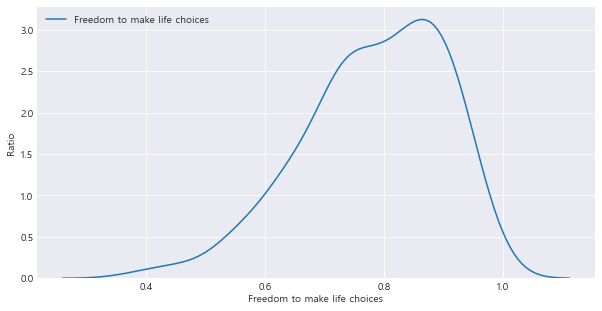

In [13]:
lc=data['Freedom to make life choices']
plt.figure(figsize=(10,5))
kdep=sns.kdeplot(lc) 
kdep.set_xlabel("Freedom to make life choices")
kdep.set_ylabel("Ratio")
print("Skewness: %f" % lc.skew()) #Skewness: 왜도, 데이터의 비대칭성 정도를 나타냄. 0에 가까울 수록 정규분포와 비슷
print("Kurtosis: %f" % lc.kurt()) #Kurtosis: 첨도, 데이터 분포의 뽀족한 정도를 나타냄. 0에 가까울 수록 정규 분포와 비슷
plt.show() 

> t-test가 가능한 분포로 보임!

In [9]:
#상위 50% 나라와 하위 50% 나라 구분
high=data[data['Ladder score']>=data['Ladder score'].quantile(0.5)]
low=data[data['Ladder score']<data['Ladder score'].quantile(0.5)]

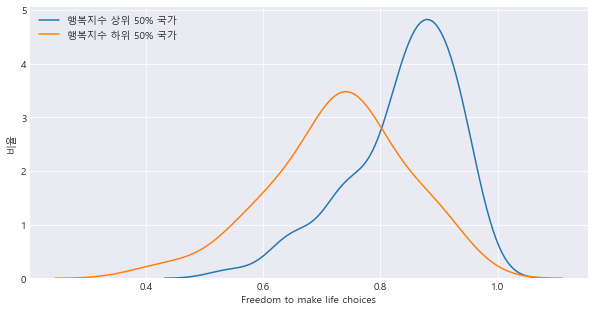

In [14]:
plt.figure(figsize=(10,5))
kdep=sns.kdeplot(high['Freedom to make life choices']) 
sns.kdeplot(low['Freedom to make life choices'])
kdep.set_xlabel('Freedom to make life choices')
kdep.set_ylabel("비율")
plt.legend(['행복지수 상위 50% 국가','행복지수 하위 50% 국가'])# 그래프마다 이름을 붙여줌!
plt.show() 

In [38]:
print("행복지수 상위 50% 국가들의 평균: ", high['Freedom to make life choices'].mean())
print("행복지수 상위 50% 국가들의 평균: ", low['Freedom to make life choices'].mean())

행복지수 상위 50% 국가들의 평균:  0.8374728235454546
행복지수 상위 50% 국가들의 평균:  0.7285355070921052


> H0: $\mu_x=\mu_y$   vs H1: $\mu_x>\mu_y$

In [27]:
np.random.seed(100)

group1 = np.random.choice(high['Freedom to make life choices'], 50) 
group2 = np.random.choice(low['Freedom to make life choices'], 50) 

> 두 표본 모두 크기가 50으로 충분히 크므로, 정규성 체크는 생략 & 서로 다른 모집단에서 랜덤으로 뽑았으므로 독립성 체크도 생략

In [28]:
# 등분산 검정

from scipy.stats import levene
print('등분산 검정 P-value=',levene(group1,group2)[1])

등분산 검정 P-value= 0.21758949864801228


> p-value가 0.05보다 크기 때문에 귀무가석 기각 불가! 따라서 분산은 같다는 가정 하에 검정.

In [33]:
#두 집단의 분산이 같을 때의 결과
tTestResult= stats.ttest_ind(group1, group2)
print("두 집단의 분산이 같을 때 t-statistic: %f p-value : %f." % tTestResult)

두 집단의 분산이 같을 때 t-statistic: 5.879301 p-value : 0.000000.


In [34]:
#(혹시나) 두 집단의 분산이 같지 않았을 경우!
tTestResultDiffVar= stats.ttest_ind(group1, group2, equal_var=False)
print("두 집단의 분산이 다를 때 t-statistic: %f p-value : %f."  % tTestResultDiffVar)

두 집단의 분산이 다를 때 t-statistic: 5.879301 p-value : 0.000000.


### 결과해석
> 단측검정이기 때문에 p-value를 2로 나누어야 하지만 나누기 이전에도 p-value=0.0000으로 귀무가설을 기각할 수 있다.
즉, 행복지수 상위 50%의 국가들의 Freedom to make life choices가 행복지수 상위 50% 국가들의 Freedom보다 크다!라는 결론을 내릴 수 있다.

## 2번

2번에서 검정을 위해 sampling을 하다가 잘 안된다! 하신 분들은 참고하세요! 
sampling 힌트
#sample_country=np.random.choice(d19[d19['Country or region'].isin(d20['Country name'])]['Country or region'],50)
#d19_free=d19[d19['Country or region'].isin(sample_country)].sort_values('Country or region')['Freedom to make life choices']
#d20_free=d20[d20['Country name'].isin(sample_country)].sort_values('Country name')['Freedom to make life choices']

In [41]:
d19 = pd.read_csv("2019.csv")
d19.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


In [42]:
d20 = data
d20.head()

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.8087,0.031156,7.869766,7.747634,10.639267,0.954330,71.900825,0.949172,-0.059482,0.195445,1.972317,1.285190,1.499526,0.961271,0.662317,0.159670,0.477857,2.762835
1,Denmark,Western Europe,7.6456,0.033492,7.711245,7.579955,10.774001,0.955991,72.402504,0.951444,0.066202,0.168489,1.972317,1.326949,1.503449,0.979333,0.665040,0.242793,0.495260,2.432741
2,Switzerland,Western Europe,7.5599,0.035014,7.628528,7.491272,10.979933,0.942847,74.102448,0.921337,0.105911,0.303728,1.972317,1.390774,1.472403,1.040533,0.628954,0.269056,0.407946,2.350267
3,Iceland,Western Europe,7.5045,0.059616,7.621347,7.387653,10.772559,0.974670,73.000000,0.948892,0.246944,0.711710,1.972317,1.326502,1.547567,1.000843,0.661981,0.362330,0.144541,2.460688
4,Norway,Western Europe,7.4880,0.034837,7.556281,7.419719,11.087804,0.952487,73.200783,0.955750,0.134533,0.263218,1.972317,1.424207,1.495173,1.008072,0.670201,0.287985,0.434101,2.168266


In [52]:
np.random.seed(10)

sample = np.random.choice(d19[d19['Country or region'].isin(d20['Country name'])]['Country or region'], 50)

In [54]:
d19_free=d19[d19['Country or region'].isin(sample)].sort_values('Country or region')['Freedom to make life choices']
d20_free=d20[d20['Country name'].isin(sample)].sort_values('Country name')['Freedom to make life choices']

> H0: $\mu_d=0$   vs H1: $\mu_d !=0$

In [59]:
# 대응표본 t-test
stats.ttest_rel(d19_free, d20_free)

Ttest_relResult(statistic=-70.53681041084985, pvalue=1.364168185485749e-43)

### 결과해석
> 대응표본 t-test 결과 p-value가 매우 작은 값으로, 귀무가설을 기각할 수 있다. 따라서, 1년 간 국가들 사이에 Freedom to make life choices에 대한 변화가 있었음을 알 수 있다. 
하지만 이 지수가 대부분의 국가들에서 2019년과 2020년 사이의 차이가 크게 나타나기 때문에 (ex. Finland: 0.596 -> 0.949, Denmark: 0.592 -> 0.951, Norway: 0.603 -> 0.955 etc.) 산출 기준이 달라졌을 수도 있다는 예상을 할 수 있다. 따라서, 통계적으로 유의미하다고 보기는 어렵다.